#**Chapter 3 : Classification**

##**Dataset : MNIST**

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
X, y = mnist['data'], mnist['target']
y = y.astype('int')

In [5]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


In [7]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

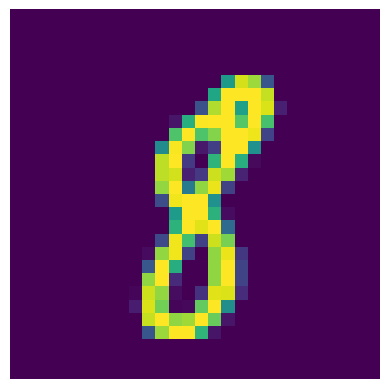

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[300].values.reshape(28, 28)
plt.imshow(some_digit, interpolation='nearest')
plt.axis('off')
plt.show()

In [9]:
#test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

print(type(X_train))

X_train shape :  (56000, 784)
X_test shape :  (14000, 784)
y_train shape :  (56000,)
y_test shape :  (14000,)
<class 'pandas.core.frame.DataFrame'>


## Binary Classifier

In [10]:
#let's train binary classifier for digit 3
import pandas as pd

y_train_3 = pd.DataFrame(y_train == 3)
y_test_3 = pd.DataFrame(y_test == 3)

print(y_train_3.shape)
print(type(y_train_3))
y_train_3

(56000, 1)
<class 'pandas.core.frame.DataFrame'>


,class
47339,False
67456,False
12308,False
32557,False
664,False
...,...
37194,False
6265,False
54886,False
860,False


In [11]:
# train binary classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [12]:
# Detection
sgd_clf.predict([X_test.iloc[132]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

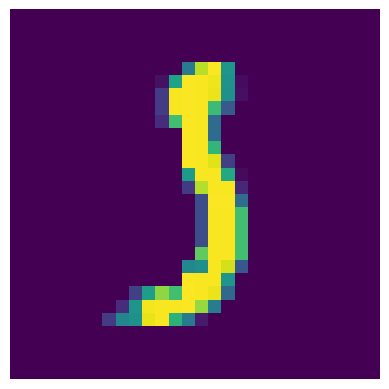

In [13]:
some_digit = X.iloc[132].values.reshape(28, 28)
plt.imshow(some_digit, interpolation='nearest')
plt.axis('off')
plt.show()

In [14]:
# Performance Measure : K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.96930412, 0.96228639, 0.9660345 ])

#Performance Measures for a Classifier

**Confusion Matrix**

In [15]:
# To have confusion matrix we need all the predictions instead of just score
from sklearn.model_selection import cross_val_predict

y_train_3_predict = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_train_3, y_train_3_predict)

In [17]:
confusion_mtx

array([[49726,   566],
       [ 1345,  4363]])

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_3, y_train_3_predict)

0.8851694055589369

In [19]:
recall_score(y_train_3, y_train_3_predict)

0.7643658023826209

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_3_predict)

0.8203440819780013

## Precision Recall Tradeoff

In [21]:
y_train_3.value_counts()

class
False    50292
True      5708
Name: count, dtype: int64

In [22]:
y_train_3.iloc[:,0]  # selects all rows and first column

47339    False
67456    False
12308    False
32557    False
664      False
         ...  
37194    False
6265     False
54886    False
860      False
15795    False
Name: class, Length: 56000, dtype: bool

**Precision Recall Curve**

In [23]:
from sklearn.model_selection import StratifiedKFold

y_train_3_scores = cross_val_predict(sgd_clf, X_train, y_train_3.iloc[:,0], cv=3, method='decision_function')

In [24]:
from sklearn.metrics import precision_recall_curve

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_train_3_scores)
print(precisions.shape, recalls.shape, thresholds.shape)

(56001,) (56001,) (56000,)


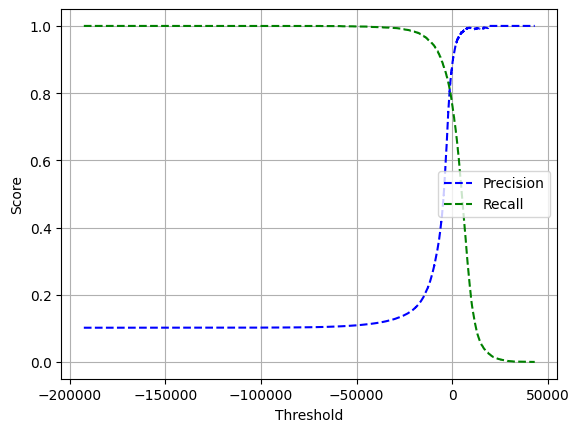

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds, recalls[:-1], "g--", label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend(loc='center right')
    plt.grid(True)
    plt.show()
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

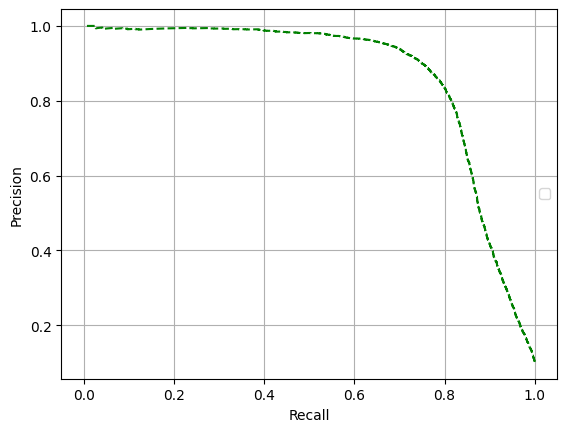

In [27]:
def plot_precision_vs_recall(precisions, recalls):
    #plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(recalls[:-1], precisions[:-1], "g--")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='center right')
    plt.grid(True)
    plt.show()
plot_precision_vs_recall(precisions, recalls)

In [28]:
import numpy as np
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

358.65094118144333

In [29]:
np.argmax(precisions)

55847

In [30]:
y_train_3_predict = (y_train_3_scores >= threshold_90_precision)

In [31]:
precision_score(y_train_3, y_train_3_predict)

0.9

In [32]:
recall_score(y_train_3, y_train_3_predict)

0.7505255781359496

In [33]:
f1_score(y_train_3, y_train_3_predict)

0.8184944593045471

**ROC Curve**

In [34]:
from sklearn.metrics import roc_curve

In [35]:
fpr, tpr, thresholds = roc_curve(y_train_3, y_train_3_scores)

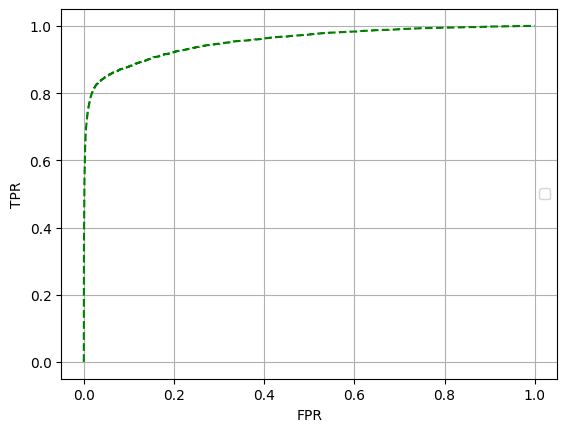

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    #plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(fpr, tpr, "g--")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc='center right')
    plt.grid(True)
    #plt.show()
plot_roc_curve(fpr=fpr, tpr=tpr)
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_3, y_train_3_scores)

0.9543283656522296

**Compare sgd_clf with random_forest clf**

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3.iloc[:,0], cv=3, method="predict_proba")

In [39]:
y_train_3

,class
47339,False
67456,False
12308,False
32557,False
664,False
...,...
37194,False
6265,False
54886,False
860,False


In [40]:
y_train_3.iloc[:,0]

47339    False
67456    False
12308    False
32557    False
664      False
         ...  
37194    False
6265     False
54886    False
860      False
15795    False
Name: class, Length: 56000, dtype: bool

In [41]:
y_probas_forest

array([[0.95, 0.05],
       [1.  , 0.  ],
       [0.97, 0.03],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.85, 0.15]])

In [42]:
y_scores_forest = y_probas_forest[:, 1]

In [43]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest)

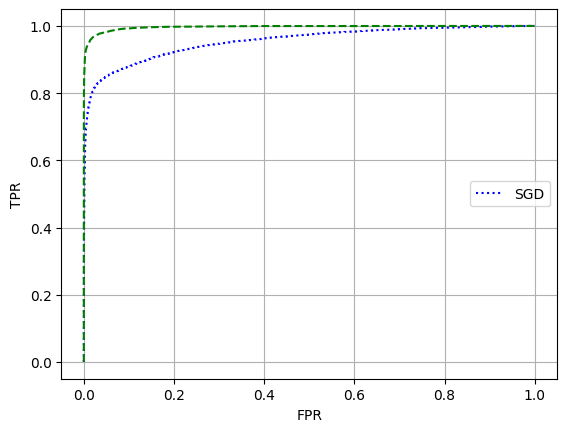

In [44]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

#MultiClass Classification

##OvA classifier

In [45]:
sgd_clf.fit(X_train, y_train) # it uses OvA by default

SGDClassifier(random_state=42)

In [48]:
some_digit = [X_test.iloc[132]]
sgd_clf.predict(some_digit)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3])

In [49]:
some_digit_scores = sgd_clf.decision_function(some_digit)
some_digit_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-37947.78559043, -47717.1146097 ,  -3342.27726029,
          5602.72719401, -19121.37610815,  -7187.10478952,
        -66448.60372885, -18877.22654854,  -6153.16878762,
         -5425.76647927]])

##OvO classifier

In [50]:
from sklearn.multiclass import OneVsOneClassifier
sgd_clf_ovo = OneVsOneClassifier(SGDClassifier(random_state=42))

In [51]:
sgd_clf_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [52]:
sgd_clf_ovo.predict(some_digit)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([3])

##RandomForest Classifier

In [53]:
forest_clf.fit(X_train, y_train)
forest_clf.predict(some_digit)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3])

##Evaluation

In [54]:
cross_val_score(sgd_clf_ovo, X_train, y_train, cv=3, scoring="accuracy")

array([0.91707291, 0.92200139, 0.91663988])

In [55]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96485777, 0.96833985, 0.96565949])

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [58]:
cross_val_score(sgd_clf_ovo, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91610864, 0.91932287, 0.91551484])

#Error Analysis

In [59]:
y_train_predict = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [60]:
conf_mx = confusion_matrix(y_train, y_train_predict)

In [61]:
conf_mx

array([[5290,    0,   15,    8,    8,   38,   40,    6,  154,    1],
       [   1, 5996,   42,   15,    3,   35,    8,   10,  155,   12],
       [  26,   28, 4982,   79,   65,   26,   56,   43,  289,   16],
       [  23,   18,  117, 4951,    2,  188,   23,   38,  288,   60],
       [  11,   17,   43,    6, 4986,   12,   43,   27,  213,  171],
       [  37,   16,   26,  148,   45, 4222,   83,   21,  369,   73],
       [  29,   17,   54,    2,   41,   89, 5134,    4,  110,    0],
       [  18,   16,   64,   20,   44,   10,    5, 5282,  103,  228],
       [  20,   59,   45,   79,    3,  130,   28,    7, 5043,   54],
       [  25,   17,   24,   60,  128,   35,    1,  149,  243, 4856]])

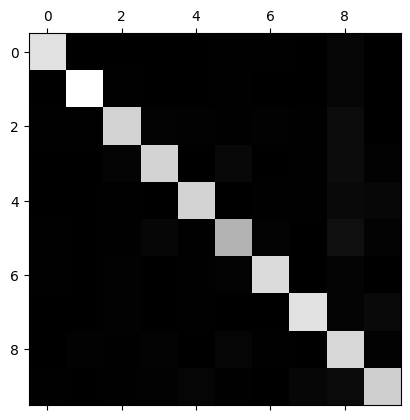

In [62]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [63]:
rows_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/rows_sum

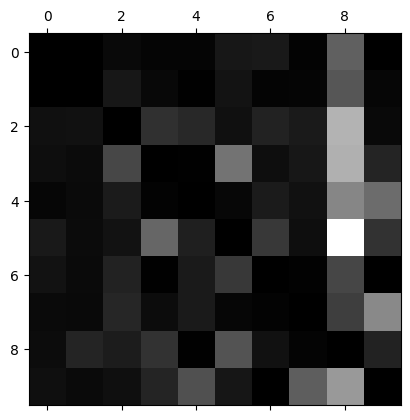

In [64]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#MultiLabel Calssification

In [68]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [69]:
knn_clf.predict(some_digit)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])